In [1]:
#!pip install tensorflow==2.0.0-rc0

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.0.0-rc0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.fashion_mnist

In [6]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
np.max(x_train)

255

In [11]:
np.mean(x_train)

72.94035223214286

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names = ['top', 'trouser', 'pillow', 'dress', 'cost', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot' ]

In [14]:
class_names

['top',
 'trouser',
 'pillow',
 'dress',
 'cost',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle_boot']

### Data Exploration

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

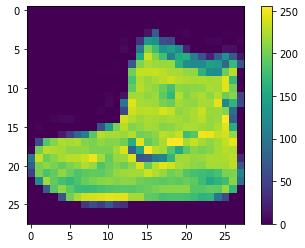

In [17]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

it is Look like Boot, 

y_train[0] value is 9 , in class_names it is Ankle_Boot  

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

colorbar value showing from 0 to 250
for scaling B/w  0 to 1 divide the x_train and x_test with 250

In [19]:
x_train = x_train/250.0

x_test = x_test/250.0

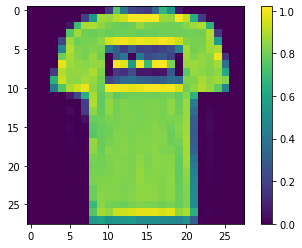

In [20]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

##### it is Look like `Top`, 

##### y_train[1] value is 0 , in class_names it is `T0p`.  

### Build the model with TF 2.0

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [22]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Model compilation
- Loss Function
- Optimizer
- Metrics

In [24]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [25]:
#model.fit(x_train, y_train, epochs= 10, batch_size = 10 )

In [26]:
#test_loss, test_acc = model.evaluate(x_test, y_test)
#print(test_acc)

In [27]:
#from sklearn.metrics import accuracy_score

In [28]:
#y_pred = model.predict_classes(x_test)

In [29]:
#y_pred

In [30]:
#y_test

In [31]:
#accuracy_score(y_test, y_pred)

In [32]:
#pred = model.predict(x_test)

In [33]:
#pred

In [34]:
#pred[0]

## validation accuracy

In [35]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [36]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [37]:
history = model.fit(x_train, y_train, epochs= 10, batch_size = 10, validation_split= 0.2 )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.5011 - accuracy: 0.8233 - val_loss: 0.4004 - val_accuracy: 0.8537
Epoch 2/10
48000/48000 [==============================] - 24s 492us/sample - loss: 0.3765 - accuracy: 0.8617 - val_loss: 0.3658 - val_accuracy: 0.8673
Epoch 3/10
48000/48000 [==============================] - 20s 426us/sample - loss: 0.3404 - accuracy: 0.8750 - val_loss: 0.3750 - val_accuracy: 0.8682
Epoch 4/10
48000/48000 [==============================] - 20s 417us/sample - loss: 0.3160 - accuracy: 0.8835 - val_loss: 0.3665 - val_accuracy: 0.8618
Epoch 5/10
48000/48000 [==============================] - 21s 427us/sample - loss: 0.2975 - accuracy: 0.8895 - val_loss: 0.3640 - val_accuracy: 0.8722
Epoch 6/10
48000/48000 [==============================] - 21s 444us/sample - loss: 0.2845 - accuracy: 0.8947 - val_loss: 0.3471 - val_accuracy: 0.8749
Epoch 7/10
48000/48000 [======================

In [38]:
history.history

{'loss': [0.5010551217772687,
  0.3764972099824809,
  0.3403564602546006,
  0.31600487071831596,
  0.29751071799808415,
  0.28450708509214867,
  0.27311274127987417,
  0.2599727730865622,
  0.24997847869170983,
  0.24241965587575276],
 'accuracy': [0.8233333,
  0.86170834,
  0.875,
  0.88352084,
  0.88947916,
  0.8946667,
  0.898625,
  0.90270835,
  0.9064583,
  0.90954167],
 'val_loss': [0.4004334934668926,
  0.3658134387076522,
  0.3749860656094582,
  0.366478943596206,
  0.3640336334257154,
  0.3470552065094428,
  0.3226228457071314,
  0.33747857006130894,
  0.3331233905824774,
  0.3539044424752501],
 'val_accuracy': [0.85366666,
  0.86725,
  0.8681667,
  0.86183333,
  0.8721667,
  0.8749167,
  0.8864167,
  0.882,
  0.88916665,
  0.87883335]}

In [39]:
import matplotlib.pyplot as plt 

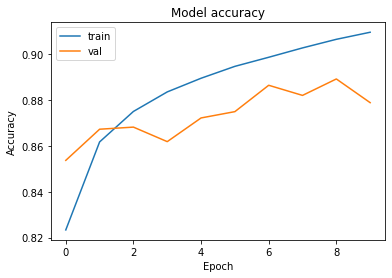

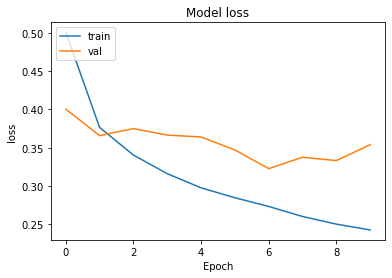

In [40]:
 # Plot training & Validation Accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()


# plot training & Validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

## Plot Confusion matrix

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
y_pred = model.predict_classes(x_test)

y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [43]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [44]:
accuracy_score(y_test, y_pred)

0.8719

In [45]:
pred = model.predict(x_test)

pred

array([[8.4228097e-10, 1.8646228e-13, 1.2344056e-12, ..., 1.1394655e-04,
        4.1972970e-10, 9.9988317e-01],
       [6.8964732e-06, 1.7196523e-13, 9.9994385e-01, ..., 1.5977290e-15,
        7.6758938e-12, 3.2156404e-16],
       [5.9195950e-09, 1.0000000e+00, 1.0673424e-12, ..., 3.9108741e-32,
        8.9118401e-17, 6.9081358e-25],
       ...,
       [1.7805476e-08, 9.6874093e-17, 7.1156421e-11, ..., 9.1730668e-12,
        9.9999976e-01, 1.7970633e-13],
       [8.3243823e-10, 9.9999034e-01, 1.9210623e-10, ..., 1.1958378e-21,
        9.5324665e-11, 3.0902332e-18],
       [1.0758970e-08, 9.6278194e-11, 7.9561737e-08, ..., 1.0897726e-03,
        8.9852576e-05, 1.5365506e-06]], dtype=float32)

In [46]:
# !pip install mlxtend 

In [49]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19035e7e048>)

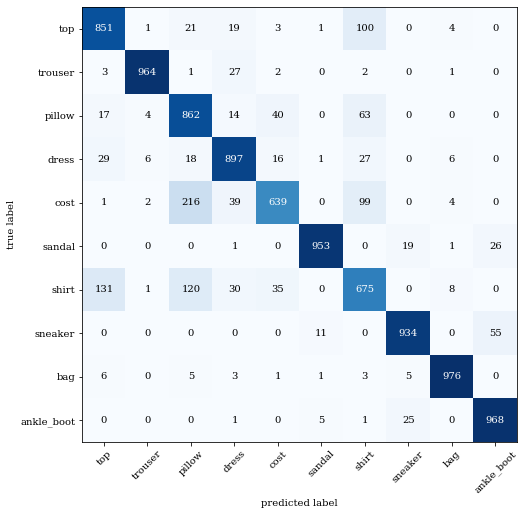

In [52]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = mat, figsize= (8,8), class_names = class_names)

In [57]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

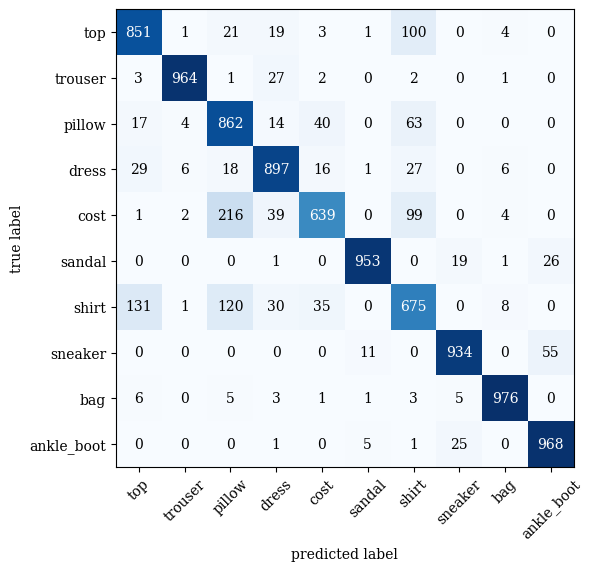

In [58]:
plt.rc ('font', family= 'Serif')

mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = mat, figsize= (6,6), class_names = class_names)
plt.tight_layout()

(<Figure size 800x800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1903633ddc8>)

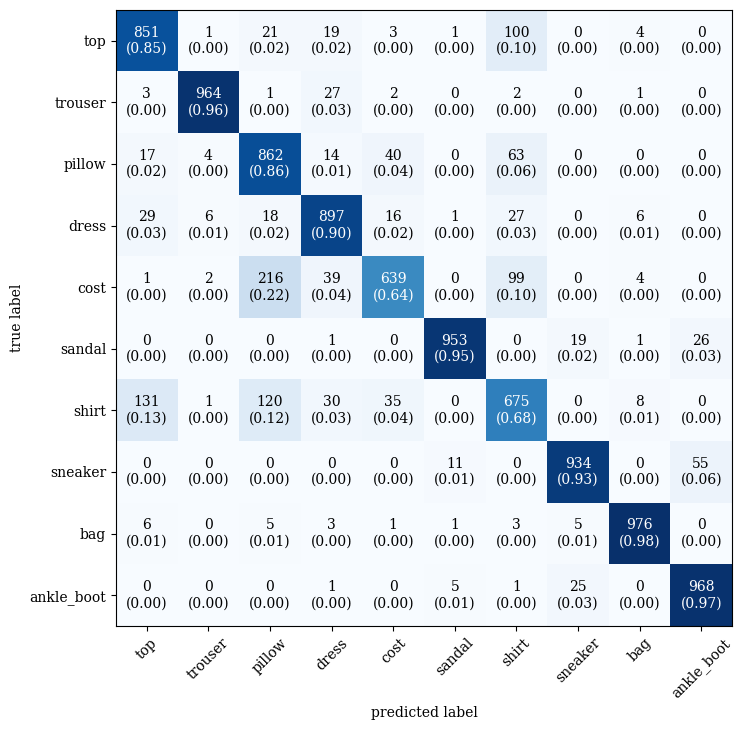

In [59]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = mat, figsize= (8,8), class_names = class_names, show_normed=True)